In [32]:
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
                                    # train_test_split : train data, test data를 나누는 함수
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re # re: 정규표현식, glob, os.path : 시스템 관련
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호(-) 표기

lang 폴더 내 파일명의 의미
en : 영어
fr : 프랑스어
id : 인도네시아어
tl : 타갈로그어

In [50]:
# 각 파일 처리 
def load_files(path):
    freqs = []
    results = []
    file_list = glob.glob(path)   
    # return file_list
    for fname in file_list: # 파일 개수(20)만큼 실행
        name = os.path.basename(fname) # 파일 1번, 파일 2번, ...
        lang = name.split('-')[0] # en, en, en, en, fr, fr, .... 
        
        with open (fname, 'r', encoding='utf-8') as f :  # fname : './lang/train\\en-1.txt', name : en-1.txt
            text = f.read()
            
        text = text.lower() # 모든 문자를 소문자로 변환
        cnt = [ 0 for n in range(0, 26) ]
        code_a = ord('a')
        code_z = ord('z')
        
        # 메모장 안의 모든 문자를 가져와서 a ~ z 사이의 문자만 저장
        for ch in text :
            n = ord(ch)
            if code_a <= n <= code_z:
                cnt[n-code_a] += 1 # b : 98-97 = 1 ==> 1의 자리에 1 증가
        
        # 정규화 작업 : 각 피쳐마다 비율을 일정하게 맞춤. 
        total = sum(cnt)
        # 데이터의 값이 0 ~ 1 사이의 값으로 변환
        freq = list(map(lambda n: n/total, cnt))
        
        # data 값을 저장
        freqs.append(freq)       
        
        # 결과값 리스트 저장       
        results.append(lang)
    return {"freqs":freqs, "results":results}
        
        

파일 확인

In [58]:
# link = './lang/train/*'
# link = './lang/train/*.txt' # 모든 txt 파일을 의미
# link2 = './lang/test/*.txt'

# # glob() : 폴더 안에 모든 데이터를 읽어 옴
# file_list = glob.glob(link)
# file_list
# # file_list = glob.glob(link2)
# # file_list
# name = os.path.basename(file_list[0]) # 경로는 제외하고, 파일 이름만 표시
# name

path = './lang/train/*.txt'
path2 = './lang/test/*.txt'

# 함수호출 : train_input, train_target, test_input, test_target
data = load_files(path) # 함수호출 : 20개의 train 데이터를 가져옴
test = load_files(path2) # 함수호출 : 8개의 test 데이터를 가져옴

data['freqs'][0:2] 
test['freqs'][0:2]
data['results'][0]


'en'


머신러닝 순서
1. 데이터 전처리
2. 데이터 학습시키기
3. 데이터 예측하기
4. 정답률 출력하기


데이터 전처리 : train 세트, test 세트 생성

In [59]:
# 데이터 학습시키기
clf = svm.SVC()
clf.fit(data['freqs'], data['results'])

# 데이터 예측하기
predict = clf.predict(test['freqs'])
print('결과 값 : ', predict)

결과 값 :  ['en' 'en' 'fr' 'fr' 'id' 'id' 'tl' 'tl']


In [60]:
score = clf.score(test['freqs'], test['results'])
print("정답률 : ", score) # 1.0 ==> 100% 의미

정답률 :  1.0


In [63]:
cl_report = metrics.classification_report(test['results'], predict)
print(cl_report)

              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



array([<Axes: title={'center': 'en'}>, <Axes: title={'center': 'fr'}>,
       <Axes: title={'center': 'id'}>, <Axes: title={'center': 'tl'}>],
      dtype=object)

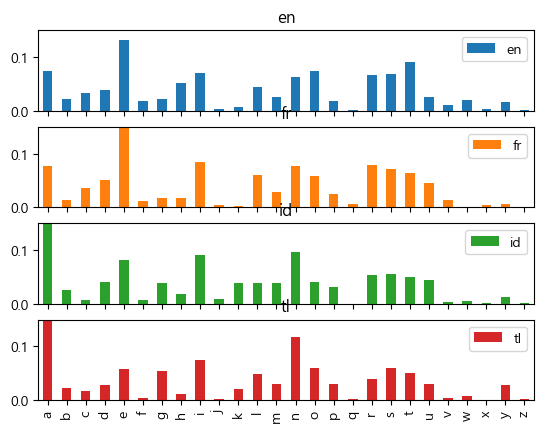

In [74]:
# 그래프 그리기
lang_dic = {}
for i, result in enumerate(data['results']) :
    fq = data['freqs'][i] # data 부분을 가지고 옴
    if not (result in lang_dic) :
        lang_dic[result] = fq
    for idx, v in enumerate(fq) :
        lang_dic[result][idx] = (lang_dic[result][idx]+v) / 2

# x축의 눈금을 생성
asc_list = [chr(n) for n in range(97, 122+1)] # 97=a , 122=z
df = pd.DataFrame(lang_dic, index=asc_list)
df.plot(kind='bar', subplots=True, ylim=(0,0.15))

In [72]:
df

,en,fr,id,tl
a,0.073784,0.076355,0.174623,0.200579
b,0.021202,0.013073,0.025192,0.022213
c,0.032696,0.036545,0.006963,0.016171
d,0.038645,0.050277,0.041022,0.028206
e,0.132751,0.148393,0.080548,0.057054
f,0.018452,0.012110,0.007269,0.004557
g,0.022586,0.016491,0.039097,0.053671
h,0.051067,0.016613,0.018837,0.011301
i,0.069726,0.085080,0.091574,0.075196
j,0.002661,0.003781,0.007939,0.002042


In [71]:
df.columns

Index(['en', 'fr', 'id', 'tl'], dtype='object')

(0.0, 0.15)

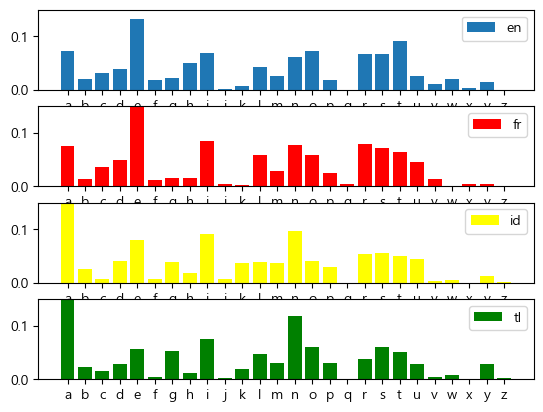

In [80]:
fig, axs = plt.subplots(4)
axs[0].bar(df.index, df['en'], label=df.columns[0])
axs[1].bar(df.index, df['fr'], label=df.columns[1], color = 'red')
axs[2].bar(df.index, df['id'], label=df.columns[2], color = 'yellow')
axs[3].bar(df.index, df['tl'], label=df.columns[3], color = 'green')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[0].set_ylim(0, 0.15)
axs[1].set_ylim(0, 0.15)
axs[2].set_ylim(0, 0.15)
axs[3].set_ylim(0, 0.15)


# 아래의 두줄로 작성 가능
# df = pd.DataFrame(lang_dic, index=asc_list)
# df.plot(kind='bar', subplots=True, ylim=(0,0.15))


In [64]:
data['freqs'][0][:3]

[0.07595212187159957, 0.012840043525571273, 0.04570184983677911]

In [35]:
# 아스키 코드(ASCII Code) : 문자를 숫자로 표시, A : 65, a : 97, 숫자 0 : 48
# chr(아스키코드 숫자) ==> 문자로 변환
chr(65) # A
chr(97) # a
chr(97-32) # A
chr(65+32) # a
chr(52-48) # \x04 ==> 숫자 4가 아닌 문자 4 출력

'\x04'

In [36]:
# ord(문자) ==> 아스키코드 숫자로 변환
ord('a')


97

In [37]:
chr(91) # [

'['

In [38]:
[0 for n in range(0,26)]

np.zeros(26)

np.ones(26)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [45]:
# 1개 파일 이름
name = os.path.basename(file_list[0])
name
lang = name.split('-')
print(lang[0])

# 1개 파일 내용 읽어오기
cnt = [0 for n in range(0,26)]
with open('./lang/train/'+name, 'r', encoding='utf-8') as f :
    # print(f.read())
    text = f.read()
    # 아스키(ASCII) 코드로 변경할거야. a = 97, b = 98, ... A = 65, B = 66, ... A+32 => a, a-32 => A
    # 대/소문자 섞여있으므로 소문자로 치환
    text = text.lower() # .lower() : 소문자로 치환
    # 문자 개수 세기
    # 영문자 : 26개 ==> 배열 26개 짜리를 1개 생성
    # 1개씩 문자를 읽어와서 26개의 배열에서 1씩 추가
    code_a = ord('a') # 97 
    code_z = ord('z') # 122
    for ch in text : # 
        n = ord(ch)
        # [ 2,0,1,0,0,0,0,0,0,...., 0]
        if code_a <= n <= code_z: # a~z 사이의 문자이면 
            # 리스트에 저장
            cnt[n-code_a] += 1 # 해당되는 위치에 1을 증가
        
    # 정규화
    total = sum(cnt)
    
    # freq의 배열의 값을 total로 나눠서 다시 list를 만듬.
    # freq = []
    # for i in cnt :
    #     freq.append({i/total}) # 이 세 줄은 아래처럼 쓸 수 있음. freq = list(map(lambda n : n/total, cnt))
    
    # def change(n):
    #     return n/total
    # freq = list(map(change(n), cnt)) # 이 세 줄을 아래와 같이 쓸 수 있음. freq = list(map(lambda n : n/total, cnt))
    
    freq = list(map(lambda n : n/total, cnt))


print(cnt)
print(freq)

en
[349, 59, 210, 212, 484, 72, 88, 201, 340, 8, 25, 247, 121, 356, 412, 76, 0, 357, 282, 370, 119, 45, 65, 3, 92, 2]
[0.07595212187159957, 0.012840043525571273, 0.04570184983677911, 0.04613710554951034, 0.10533188248095757, 0.015669205658324265, 0.019151251360174103, 0.043743199129488576, 0.07399347116430903, 0.0017410228509249185, 0.00544069640914037, 0.05375408052230685, 0.026332970620239392, 0.07747551686615888, 0.08966267682263329, 0.016539717083786723, 0.0, 0.07769314472252448, 0.061371055495103376, 0.08052230685527748, 0.02589771490750816, 0.009793253536452665, 0.014145810663764961, 0.0006528835690968443, 0.02002176278563656, 0.0004352557127312296]


In [46]:
# name = os.path.basename(file_list[0]) 
# 폴더의 모든 파일의 이름을 가져옴.

data = []
results = []

for fname in file_list :
    name = os.path.basename(fname)
    # print(name)
    
    # 데이터 가져오기
    
    
    
    
    # str split을 사용해서 앞에 있는 2글자만 분리해서 출력하시오.
    lang = name.split('-')
    # print(lang[0])
    results.append(lang[0])

results
    